<div align="center">

###### Lab 2

# National Tsing Hua University

#### Spring 2025

#### 11320IEEM 513600

#### Deep Learning and Industrial Applications
    
## Lab 2: Predicting Heart Disease with Deep Learning

</div>

### Introduction

In the realm of healthcare, early detection and accurate prediction of diseases play a crucial role in patient care and management. Heart disease remains one of the leading causes of mortality worldwide, making the development of effective diagnostic tools essential. This lab leverages deep learning to predict the presence of heart disease in patients using a subset of 14 key attributes from the Cleveland Heart Disease Database. The objective is to explore and apply deep learning techniques to distinguish between the presence and absence of heart disease based on clinical parameters.

Throughout this lab, you'll engage with the following key activities:
- Use [Pandas](https://pandas.pydata.org) to process the CSV files.
- Use [PyTorch](https://pytorch.org) to build an Artificial Neural Network (ANN) to fit the dataset.
- Evaluate the performance of the trained model to understand its accuracy.

### Attribute Information

1. age: Age of the patient in years
2. sex: (Male/Female)
3. cp: Chest pain type (4 types: low, medium, high, and severe)
4. trestbps: Resting blood pressure
5. chol: Serum cholesterol in mg/dl
6. fbs: Fasting blood sugar > 120 mg/dl
7. restecg: Resting electrocardiographic results (values 0,1,2)
8. thalach: Maximum heart rate achieved
9. exang: Exercise induced angina
10. oldpeak: Oldpeak = ST depression induced by exercise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by fluoroscopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversible defect
14. target: target have disease or not (1=yes, 0=no)

### References
- [UCI Heart Disease Data](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data) for the dataset we use in this lab.


## A. Checking and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_dataset_train_all.csv 的副本')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,Male,medium,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,Female,low,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,Female,medium,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,Female,high,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,Female,severe,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,Female,low,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,Female,low,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,Female,high,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,Female,low,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       273 non-null    int64  
 1   sex       272 non-null    object 
 2   cp        272 non-null    object 
 3   trestbps  272 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       273 non-null    int64  
 6   restecg   272 non-null    float64
 7   thalach   272 non-null    float64
 8   exang     273 non-null    int64  
 9   oldpeak   273 non-null    float64
 10  slope     271 non-null    float64
 11  ca        273 non-null    int64  
 12  thal      272 non-null    float64
 13  target    272 non-null    float64
dtypes: float64(8), int64(4), object(2)
memory usage: 30.0+ KB


In [ ]:
# checking for null values
df.isnull().sum()

,0
age,0
sex,1
cp,1
trestbps,1
chol,2
fbs,0
restecg,1
thalach,1
exang,0
oldpeak,0


In [ ]:
df = df.dropna()

In [ ]:
df.shape

(270, 14)

In [ ]:
# Mapping 'sex' descriptions to numbers
sex_description = {
    'Male': 0,
    'Female': 1,
}
df.loc[:, 'sex'] = df['sex'].map(sex_description)

# Mapping 'cp' (chest pain) descriptions to numbers
pain_description = {
    'low': 0,
    'medium': 1,
    'high': 2,
    'severe': 3
}
df.loc[:, 'cp'] = df['cp'].map(pain_description)

df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,41,0,1,105.0,198.0,0,1.0,168.0,0,0.0,2.0,1,2.0,1.0
1,65,1,0,120.0,177.0,0,1.0,140.0,0,0.4,2.0,0,3.0,1.0
2,44,1,1,130.0,219.0,0,0.0,188.0,0,0.0,2.0,0,2.0,1.0
3,54,1,2,125.0,273.0,0,0.0,152.0,0,0.5,0.0,1,2.0,1.0
4,51,1,3,125.0,213.0,0,0.0,125.0,1,1.4,2.0,1,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,40,1,0,110.0,167.0,0,0.0,114.0,1,2.0,1.0,0,3.0,0.0
269,60,1,0,117.0,230.0,1,1.0,160.0,1,1.4,2.0,2,3.0,0.0
270,64,1,2,140.0,335.0,0,1.0,158.0,0,0.0,2.0,0,2.0,0.0
271,43,1,0,120.0,177.0,0,0.0,120.0,1,2.5,1.0,0,3.0,0.0


In [ ]:
df.describe()

,age,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.385185,131.525926,245.607407,0.151852,0.522222,149.807407,0.333333,1.024074,1.400000,0.744444,2.300000,0.544444
std,9.149713,17.904675,51.529411,0.359544,0.529314,23.217253,0.472280,1.188379,0.618188,1.037166,0.623874,0.498946
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,120.000000,210.250000,0.000000,0.000000,134.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.000000,0.000000,1.000000,167.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.062222,-0.103697,0.261782,0.210520,0.109847,-0.124588,-0.412624,0.111263,0.200243,-0.165360,0.254462,0.077368,-0.244798
sex,-0.062222,1.000000,-0.040197,-0.055463,-0.166885,0.042384,-0.069599,-0.058626,0.124054,0.089726,-0.038771,0.140795,0.198493,-0.283776
cp,-0.103697,-0.040197,1.000000,0.035563,-0.063592,0.065869,0.008389,0.300307,-0.428233,-0.183616,0.135174,-0.180598,-0.139765,0.425574
trestbps,0.261782,-0.055463,0.035563,1.000000,0.128444,0.170606,-0.145195,-0.056631,0.067116,0.184896,-0.126553,0.093545,0.068690,-0.173239
chol,0.210520,-0.166885,-0.063592,0.128444,1.000000,0.003430,-0.162687,-0.023753,0.063902,0.084355,-0.031929,0.068647,0.121280,-0.096773
fbs,0.109847,0.042384,0.065869,0.170606,0.003430,1.000000,-0.086165,-0.014297,0.029190,0.007943,-0.056866,0.164266,-0.004972,-0.068845
restecg,-0.124588,-0.069599,0.008389,-0.145195,-0.162687,-0.086165,1.000000,0.025457,-0.089225,-0.047837,0.074982,-0.053946,-0.003377,0.101817
thalach,-0.412624,-0.058626,0.300307,-0.056631,-0.023753,-0.014297,0.025457,1.000000,-0.404349,-0.340564,0.370073,-0.205060,-0.078637,0.432687
exang,0.111263,0.124054,-0.428233,0.067116,0.063902,0.029190,-0.089225,-0.404349,1.000000,0.294308,-0.280124,0.106250,0.189253,-0.457502
oldpeak,0.200243,0.089726,-0.183616,0.184896,0.084355,0.007943,-0.047837,-0.340564,0.294308,1.000000,-0.585472,0.223375,0.200315,-0.443504


#### Converting the DataFrame to a NumPy Array

In [ ]:
import numpy as np

np_data = df.values
np_data.shape

(270, 14)

In [ ]:
split_point = int(np_data.shape[0]*0.7)

np.random.shuffle(np_data)

x_train = np_data[:split_point, :13]
y_train = np_data[:split_point, 13]
x_val = np_data[split_point:, :13]
y_val = np_data[split_point:, 13]

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
x_train = np.array(x_train, dtype=float)
x_train = torch.from_numpy(x_train).float()
y_train = np.array(y_train, dtype=int)
y_train = torch.from_numpy(y_train).long()

x_val = np.array(x_val, dtype=float)
x_val = torch.from_numpy(x_val).float()
y_val = np.array(y_val, dtype=int)
y_val = torch.from_numpy(y_val).long()

batch_size = 128

# Create datasets
train_dataset = TensorDataset(x_train, y_train)
val_dataset = TensorDataset(x_val, y_val)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print(f'Number of samples in train and validation are {len(train_loader.dataset)} and {len(val_loader.dataset)}.')

Number of samples in train and validation are 189 and 81.


## B. Defining Neural Networks

In PyTorch, we can use **class** to define our custom neural network architectures by subclassing the `nn.Module` class. This gives our neural network all the functionality it needs to work with PyTorch's other utilities and keeps our implementation organized.

- Neural networks are defined by subclassing `nn.Module`.
- The layers of the neural network are initialized in the `__init__` method.
- The forward pass operations on input data are defined in the `forward` method.

It's worth noting that while we only define the forward pass, PyTorch will automatically derive the backward pass for us, which is used during training to update the model's weights."

In [ ]:
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(13, 256),
            nn.ReLU(),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Linear(256, 2)
        ).cuda()

    def forward(self, x):
        return self.model(x)

## C. Training the Neural Network

In [ ]:
# Check your GPU status.
!nvidia-smi

Thu Mar 27 15:13:29 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P0             28W /   70W |     160MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from tqdm.auto import tqdm

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

epochs = 100

model = Model()
# print(model)

best_val_loss = float('inf')
best_val_acc = -1

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)  # 超參數學習率 = 0.01, 0.001, 0.0001
lr_scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min=0)

for epoch in tqdm(range(epochs)):
    # Training
    model.train()
    total_loss = 0.0
    train_correct = 0
    total_train_samples = 0

    for features, labels in train_loader:
        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_predicted = outputs.argmax(-1)
        train_correct += (train_predicted == labels).sum().item()
        total_train_samples += labels.size(0)

    # Learning rate update
    lr_scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    train_accuracy = 100. * train_correct / total_train_samples

    # Validation
    model.eval()
    total_val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in val_loader:
            features = features.cuda()
            labels = labels.cuda()

            outputs = model(features)

            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            predicted = outputs.argmax(-1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = 100. * correct / total

    # Checkpoint
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss

    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(model.state_dict(), 'model_classification.pth')

    print(f'Epoch {epoch+1}/{epochs}, Train loss: {avg_train_loss:.4f}, Train acc: {train_accuracy:.4f}%, Val loss: {avg_val_loss:.4f}, Val acc: {val_accuracy:.4f}%, Best Val loss: {best_val_loss:.4f} Best Val acc: {best_val_acc:.2f}%')

    # Store performance
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_accuracy)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 1/100, Train loss: 7.7052, Train acc: 47.6190%, Val loss: 5.7804, Val acc: 40.7407%, Best Val loss: 5.7804 Best Val acc: 40.74%
Epoch 2/100, Train loss: 4.2034, Train acc: 47.6190%, Val loss: 1.8586, Val acc: 40.7407%, Best Val loss: 1.8586 Best Val acc: 40.74%
Epoch 3/100, Train loss: 1.2118, Train acc: 45.5026%, Val loss: 1.3817, Val acc: 59.2593%, Best Val loss: 1.3817 Best Val acc: 59.26%
Epoch 4/100, Train loss: 1.9036, Train acc: 52.3810%, Val loss: 2.2454, Val acc: 59.2593%, Best Val loss: 1.3817 Best Val acc: 59.26%
Epoch 5/100, Train loss: 2.6480, Train acc: 52.3810%, Val loss: 2.0161, Val acc: 59.2593%, Best Val loss: 1.3817 Best Val acc: 59.26%
Epoch 6/100, Train loss: 2.1429, Train acc: 52.3810%, Val loss: 1.1444, Val acc: 59.2593%, Best Val loss: 1.1444 Best Val acc: 59.26%
Epoch 7/100, Train loss: 1.0646, Train acc: 52.9101%, Val loss: 0.7215, Val acc: 41.9753%, Best Val loss: 0.7215 Best Val acc: 59.26%
Epoch 8/100, Train loss: 0.8096, Train acc: 52.3810%, Val loss

#### Visualizing the model performance

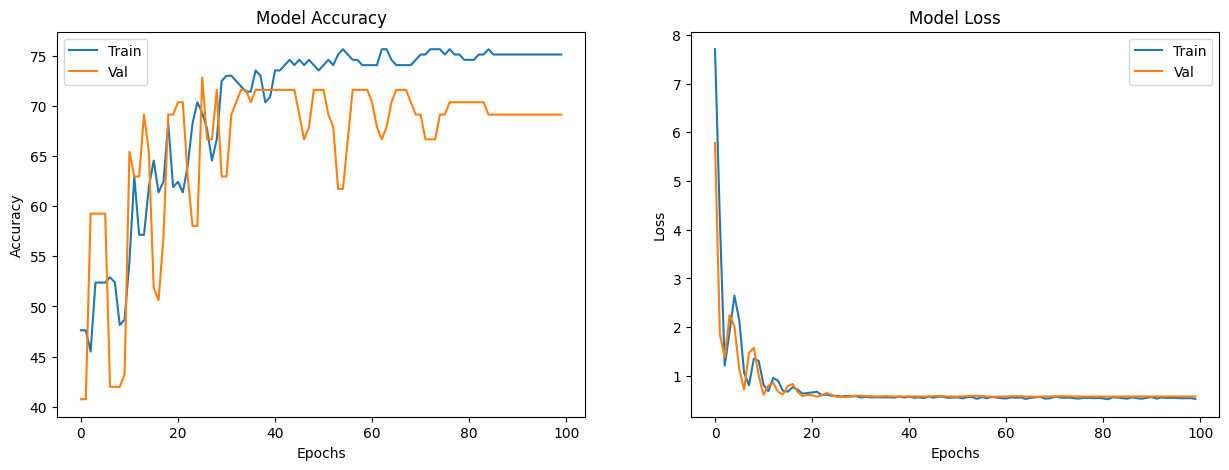

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plotting training and validation accuracy
ax[0].plot(train_accuracies)
ax[0].plot(val_accuracies)
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Val'])

# Plotting training and validation loss
ax[1].plot(train_losses)
ax[1].plot(val_losses)
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Val'])

plt.show()

## D. Evaluating Your Trained Model

In [ ]:
# read test file
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_dataset_test.csv 的副本')
test_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
1,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
2,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
3,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
4,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1


In [ ]:
test_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
test_data = test_data.values
test_data.shape

(31, 14)

In [ ]:
# Convert to PyTorch tensors
x_test = torch.from_numpy(test_data[:, :13]).float()
y_test = torch.from_numpy(test_data[:, 13]).long()

# Create datasets
test_dataset = TensorDataset(x_test, y_test)

# Create dataloaders
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

In [ ]:
# Load the trained weights
model.load_state_dict(torch.load('model_classification.pth'))

# Set the model to evaluation mode
model.eval()

test_correct = 0
test_total = 0

with torch.no_grad():
    for features, labels in test_loader:

        features = features.cuda()
        labels = labels.cuda()

        outputs = model(features)

        predicted = outputs.argmax(-1)
        test_correct += (predicted == labels).sum().item()
        test_total += labels.size(0)

print(f'Test accuracy is {100. * test_correct / test_total}%')

Test accuracy is 61.29032258064516%
